<a href="https://colab.research.google.com/github/luxizh/EE62_Select_topic_for_Computer_Vision_Colab/blob/master/EE4_62_lab2_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network for multi-class classification
###LeNet




## Introduction

This tutorial demonstrates the basic workflow of using TensorFlow with a simple CNN model. After loading the  MNIST data-set with images of hand-written digits, we define and optimize a simple mathematical model in TensorFlow. The results are then plotted and discussed.

You should be familiar with basic linear algebra, Python and the Jupyter Notebook editor. It also helps if you have a basic understanding of Machine Learning and classification.


## Imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pickle

In [0]:
tf.__version__
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8910024601308533499, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 10221992503949717107
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 6125831510905624014
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11276946637
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 2036423188201080790
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [0]:

filename = 'test_images0.data'
f = open(filename, 'rb')
test_images0 = pickle.load(f)
f.close()
filename = 'test_label0.data'
f = open(filename, 'rb')
test_label0 = pickle.load(f)
f.close()

filename = 'test_images1.data'
f = open(filename, 'rb')
test_images1 = pickle.load(f)
f.close()
filename = 'test_label1.data'
f = open(filename, 'rb')
test_label1 = pickle.load(f)
f.close()

filename = 'test_images2.data'
f = open(filename, 'rb')
test_images2 = pickle.load(f)
f.close()
filename = 'test_label2.data'
f = open(filename, 'rb')
test_label2 = pickle.load(f)
f.close()

filename = 'test_images3.data'
f = open(filename, 'rb')
test_images3 = pickle.load(f)
f.close()
filename = 'test_label3.data'
f = open(filename, 'rb')
test_label3 = pickle.load(f)
f.close()

filename = 'test_images4.data'
f = open(filename, 'rb')
test_images4 = pickle.load(f)
f.close()
filename = 'test_label4.data'
f = open(filename, 'rb')
test_label4 = pickle.load(f)
f.close()

filename = 'test_images5.data'
f = open(filename, 'rb')
test_images5 = pickle.load(f)
f.close()
filename = 'test_label5.data'
f = open(filename, 'rb')
test_label5 = pickle.load(f)
f.close()

In [0]:
print(test_images5.shape)
#test_images=np.concatenate((test_images,test_images))
#print(test_images.shape)
#test_label5np.where

(10000, 32, 32, 1)


## Load Data

The MNIST data-set is about 12 MB and will be downloaded automatically if it is not located in the given path.

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.utils import shuffle

mnist = input_data.read_data_sets("MNIST_data/", reshape=False)
'''
X_train, y_train           = mnist.train.images, mnist.train.labels
X_train, y_train = shuffle(X_train, y_train)

#X_train, y_train = X_train[0:5000], y_train[0:5000]

#from here
real_idx=[]
for real_label in range(10):
    real_idx_i=np.where(y_train==real_label)
    #print(type(real_idx_i))
    #print(real_idx_i)
    real_idx_i=list(real_idx_i[0])
    #print(real_idx_i)
    real_idx=real_idx+real_idx_i[0:500]
#real_idx=tuple(real_idx)
X_train=X_train[real_idx]  
y_train=y_train[real_idx] 
#to there comment

X_train      = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
'''

#from here
X_train = np.concatenate((test_images0,test_images1,test_images2,test_images3,test_images4,test_images5))
y_train = np.concatenate((test_label0,test_label1,test_label2,test_label3,test_label4,test_label5))
print(X_train.shape)
print("Training Set:   {} samples".format(len(X_train)))
X_train, y_train = shuffle(X_train, y_train)
X_validation, y_validation=X_train[55000:57500], y_train[55000:57500]
X_train, y_train=X_train[0:55000], y_train[0:55000]
#to there comment


#idx5=[]
#for idx in range(10):
#    idx5=idx5+list(range(idx*1000,idx*1000+500))
#X_train = np.concatenate((test_images0,test_images1,test_images2,test_images3,test_images4,test_images5[idx5]))
#y_train = np.concatenate((test_label0,test_label1,test_label2,test_label3,test_label4,test_label5[idx5]))
X_validation_real, y_validation_real = mnist.validation.images, mnist.validation.labels
X_validation_real, y_validation_real = shuffle(X_validation_real, y_validation_real)
X_validation_real = np.pad(X_validation_real, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_validation_real, y_validation_real = X_validation_real[0:2500], y_validation_real[0:2500]
X_validation = np.concatenate((X_validation,X_validation_real))
y_validation = np.concatenate((y_validation,y_validation_real))
X_test, y_test             = mnist.test.images, mnist.test.labels
X_test       = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
(60000, 32, 32, 1)
Training Set:   60000 samples

Image Shape: (32, 32, 1)

Training Set:   55000 samples
Validation Set: 5000 samples
Test Set:       10000 samples


The MNIST data-set has now been loaded and consists of 70.000 images and class-numbers for the images. The data-set is split into 3 mutually exclusive sub-sets. We will only use the training and test-sets in this tutorial.


The MNIST data that TensorFlow pre-loads comes as 28x28x1 images.

However, the LeNet architecture only accepts 32x32xC images, where C is the number of color channels.

In order to reformat the MNIST data into a shape that LeNet will accept, we pad the data with two rows of zeros on the top and bottom, and two columns of zeros on the left and right (28+2+2 = 32).

You do not need to modify this section.

In [0]:
'''
import numpy as np


# Pad images with 0s
X_train      = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_validation = np.pad(X_validation, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test       = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')
    
print("Updated Image Shape: {}".format(X_train[0].shape))
'''

'\nimport numpy as np\n\n\n# Pad images with 0s\nX_train      = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), \'constant\')\nX_validation = np.pad(X_validation, ((0,0),(2,2),(2,2),(0,0)), \'constant\')\nX_test       = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), \'constant\')\n    \nprint("Updated Image Shape: {}".format(X_train[0].shape))\n'

#Visualize the data 
View a sample from the dataset.

You do not need to modify this section.


Label of the image is:0


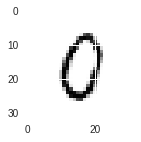

In [0]:
import pdb
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(2,2))
plt.imshow(image)
print("Label of the image is:%d"%y_train[index])

#Preprocess the data 
Shuffle the training data.

In [0]:


X_train, y_train = shuffle(X_train, y_train)
import tensorflow as tf

EPOCHS = 30
BATCH_SIZE = 128

#Setup TensorFlow
The EPOCH and BATCH_SIZE values affect the training speed and model accuracy.

 


#Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

#Architecture
##Layer 1: Convolutional.
####The output shape should be 28x28x6.

####Activation. Your choice of activation function.

####Pooling. The output shape should be 14x14x6.

#Layer 2: Convolutional. 
####The output shape should be 10x10x16.

####Activation. Your choice of activation function.

####Pooling. The output shape should be 5x5x16.

####Flatten. Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using tf.contrib.layers.flatten, which is already imported for you.

#Layer 3: Fully Connected. 
####This should have 120 outputs.
####Activation. Your choice of activation function.

#Layer 4: Fully Connected. 
####This should have 84 outputs.

####Activation. Your choice of activation function.

#Layer 5: Fully Connected (Logits).
####This should have 10 outputs.






![alt text](https://cdn-images-1.medium.com/max/2200/1*1TI1aGBZ4dybR6__DI9dzA.png)

In [0]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
 
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_w = tf.Variable(tf.truncated_normal(shape = [5,5,1,6], mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_w, strides = [1,1,1,1], padding = 'VALID') + conv1_b 
    
    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    pool_1 = tf.nn.max_pool(conv1,ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    
    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_w = tf.Variable(tf.truncated_normal(shape = [5,5,6,16], mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(pool_1, conv2_w, strides = [1,1,1,1], padding = 'VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    pool_2 = tf.nn.max_pool(conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID') 
    
    # Flatten. Input = 5x5x16. Output = 400.
    fc1 = flatten(pool_2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_w = tf.Variable(tf.truncated_normal(shape = (400,120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc1,fc1_w) + fc1_b
    
    # Activation.
    fc1 = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_w = tf.Variable(tf.truncated_normal(shape = (120,84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1,fc2_w) + fc2_b
    
    # Activation.
    fc2 = tf.nn.relu(fc2)
    
    # Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_w = tf.Variable(tf.truncated_normal(shape = (84,10), mean = mu , stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(10))
    logits = tf.matmul(fc2, fc3_w) + fc3_b
    return logits 

#Features and Labels

Train LeNet to classify MNIST data.

x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.

In [0]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 10)

 ### One-Hot Encoding

The output-data is loaded as both integer class-numbers and so-called One-Hot encoded arrays. This means the class-numbers have been converted from a single integer to a vector whose length equals the number of possible classes. All elements of the vector are zero except for the $i$'th element which is 1 and means the class is $i$. For example, the One-Hot encoded labels for the first 5 images in the test-set are:

#Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

 

In [0]:
rate = 0.005

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)  
loss_operation = tf.reduce_mean(cross_entropy)
#optimizer = tf.train.AdamOptimizer(learning_rate=rate)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=rate)
training_operation = optimizer.minimize(loss_operation)

#Function to Evaluate Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

 


In [0]:
predictions_operation = tf.argmax(tf.nn.softmax(logits), 1)
correct_prediction = tf.equal(predictions_operation, tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    all_predictions = []
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy, predictions = sess.run([accuracy_operation, predictions_operation], feed_dict={x: batch_x, y: batch_y})
        
        all_predictions = np.hstack((all_predictions, predictions))
        total_accuracy += (accuracy * len(batch_x))
    all_predictions = np.array(all_predictions)
    return total_accuracy / num_examples, all_predictions

#Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

 

In [0]:

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
         
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy, validation_predictions = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.629

EPOCH 2 ...
Validation Accuracy = 0.901

EPOCH 3 ...
Validation Accuracy = 0.933

EPOCH 4 ...
Validation Accuracy = 0.951

EPOCH 5 ...
Validation Accuracy = 0.958

EPOCH 6 ...
Validation Accuracy = 0.962

EPOCH 7 ...
Validation Accuracy = 0.970

EPOCH 8 ...
Validation Accuracy = 0.974

EPOCH 9 ...
Validation Accuracy = 0.977

EPOCH 10 ...
Validation Accuracy = 0.977

EPOCH 11 ...
Validation Accuracy = 0.979

EPOCH 12 ...
Validation Accuracy = 0.982

EPOCH 13 ...
Validation Accuracy = 0.981

EPOCH 14 ...
Validation Accuracy = 0.984

EPOCH 15 ...
Validation Accuracy = 0.983

EPOCH 16 ...
Validation Accuracy = 0.984

EPOCH 17 ...
Validation Accuracy = 0.983

EPOCH 18 ...
Validation Accuracy = 0.983

EPOCH 19 ...
Validation Accuracy = 0.984

EPOCH 20 ...
Validation Accuracy = 0.984

EPOCH 21 ...
Validation Accuracy = 0.987

EPOCH 22 ...
Validation Accuracy = 0.986

EPOCH 23 ...
Validation Accuracy = 0.988

EPOCH 24 ...
Validation Accura

#Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

 

In [0]:

with tf.Session() as session:
    saver.restore(session, tf.train.latest_checkpoint('.'))

    test_accuracy, test_predictions = evaluate(X_test, y_test)
    print("Test Accuracy = {:.6f}".format(test_accuracy))
    print(type(test_accuracy))


INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.968300
<class 'numpy.float64'>


In [0]:
portion=[]
test_acc=[]
test_accuracy=0.976

In [0]:
portion.append(0/6)
test_acc.append(test_accuracy)
print(portion,test_acc)

[1.0, 0.8333333333333334, 0.6666666666666666, 0.5, 0.3333333333333333, 0.16666666666666666, 0.0] [0.976, 0.979, 0.9796, 0.9758, 0.9715, 0.9653, 0.5692]


In [0]:
test_acc_rt1=[]

In [0]:
test_acc_rt1.append(test_accuracy)
print(portion,test_acc_rt1)

[1.0, 0.8333333333333334, 0.6666666666666666, 0.5, 0.3333333333333333, 0.16666666666666666] [0.9364, 0.9364, 0.9442, 0.94, 0.9234]


In [0]:
test_acc_rt1[3]=0.940000
print(portion,test_acc_rt1)

[1.0, 0.8333333333333334, 0.6666666666666666, 0.5, 0.3333333333333333, 0.16666666666666666, 0.0] [0.9364, 0.9364, 0.9442, 0.94, 0.9234]


In [0]:
test_num=[]
acc1=[]
acc2=[]
current=1

In [0]:
acc1.append(test_accuracy)
test_num.append(current)
current+=1
print(test_num,acc1)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] [0.9683, 0.9655, 0.9671, 0.9682, 0.9695, 0.9671, 0.9678, 0.9688, 0.9697, 0.968]


In [0]:
acc2.append(test_accuracy)
print(acc2)

[0.9672, 0.9653, 0.9679, 0.9683]


In [0]:
filename = 'portion.data'
f = open(filename, 'wb')
pickle.dump(portion,f)
f.close()
filename = 'test_acc_rt5.data'
f = open(filename, 'wb')
pickle.dump(test_acc,f)
f.close()
filename = 'test_acc_rt1.data'
f = open(filename, 'wb')
pickle.dump(test_acc_rt1,f)
f.close()

In [0]:
import pickle
f = open('./test_images.data', 'rb')

test_images = pickle.load(f)
print(test_images.shape)
f.close()
f1 = open('./test_label.data', 'rb')

test_label = pickle.load(f1)
print(test_label.shape)
f1.close()

with tf.Session() as sess:

    saver.restore(sess,tf.train.latest_checkpoint("."))
    
    test_accuracy, test_predictions = evaluate(test_images, test_label)
    #print(test_predictions)
    #print(test_label[9020:9080])
    print("Test Accuracy = {:.6f}".format(test_accuracy))

#here is the end

FileNotFoundError: ignored

In [0]:
import pickle
acc_aver=[]
pred_all=[]
label_all=[]
for j in range(6):
    filename1 = 'test_images'+str(j)+'.data'
    filename2 = 'test_label'+str(j)+'.data'
    f = open(filename1, 'rb')
    test_images = pickle.load(f)
    f.close()
    f = open(filename2, 'rb')
    test_label = pickle.load(f)
    f.close()
    with tf.Session() as sess:
        saver.restore(sess,tf.train.latest_checkpoint("."))

        test_accuracy, test_predictions = evaluate(test_images, test_label)
        #print(test_predictions)
        #print(test_label[9020:9080])
        print("Test Accuracy = {:.6f}".format(test_accuracy))
        acc_aver.append(test_accuracy)
        test_predictions=list(test_predictions)
        pred_all=pred_all+test_predictions
    test_label=list(test_label)
    label_all=label_all+test_label
print(np.mean(acc_aver))
filename = 'label_all.data'
f = open(filename, 'wb')
pickle.dump(label_all,f)
f.close()
filename = 'pred_all.data'
f = open(filename, 'wb')
pickle.dump(pred_all,f)
f.close()

FileNotFoundError: ignored

In [0]:
for j in range(2,41,2):
    print(j)

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40


In [0]:
import pickle
acc=[]
pred_all=[]
label_all=[]
for j in range(6):
    filename1 = 'test_images'+str(j)+'.data'
    filename2 = 'test_label'+str(j)+'.data'
    f = open(filename1, 'rb')
    test_images = pickle.load(f)
    f.close()
    f = open(filename2, 'rb')
    test_label = pickle.load(f)
    f.close()
    with tf.Session() as sess:
        saver.restore(sess,tf.train.latest_checkpoint("."))

        test_accuracy, test_predictions = evaluate(test_images, test_label)
        #print(test_predictions)
        #print(test_label[9020:9080])
        print("Test Accuracy = {:.6f}".format(test_accuracy))
        acc.append(test_accuracy)
        test_predictions=list(test_predictions)
        pred_all=pred_all+test_predictions
    test_label=list(test_label)
    label_all=label_all+test_label
print(np.mean(acc))
print(acc)

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.899200
INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.899800
INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.894600
INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.892100
INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.896200
INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.895100
0.8961666666666668
[0.8992, 0.8998, 0.8946, 0.8921, 0.8962, 0.8951]


20


(array([0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 9 Text yticklabel objects>)

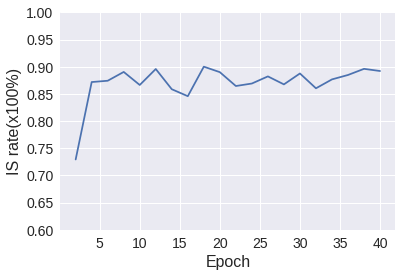

In [0]:
f = open('./acc.data', 'rb')

acc = pickle.load(f)
print(len(acc))
f.close()
x=[]
for j in range(2,41,2):
    x.append(j)
fig = plt.figure()
plt.plot(x, acc )
plt.xlabel('Epoch',fontsize=16)
plt.ylabel('IS rate(x100%)',fontsize=16)
plt.ylim((.6,1))
#my_x_ticks = np.arange(0,41,2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


In [0]:
from google.colab import files
import os
files.download('./lenet.index')
files.download('./lenet.meta')
files.download('./lenet.data-00000-of-00001')
files.download('./checkpoint')

In [0]:
import pickle
f = open('./test_images12.data', 'rb')

test_images = pickle.load(f)
print(test_images.shape)
f.close()
f1 = open('./test_label12.data', 'rb')

test_label = pickle.load(f1)
print(test_label.shape)
f1.close()

with tf.Session() as sess:

    saver.restore(sess,tf.train.latest_checkpoint("."))
    
    test_accuracy, test_predictions = evaluate(test_images, test_label)
    #print(test_predictions)
    #print(test_label[9020:9080])
    print("Test Accuracy = {:.3f}".format(test_accuracy))
acc.append(test_accuracy)
print(acc)

(10000, 32, 32, 1)
(10000,)
INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.743
[0.6906, 0.6766, 0.7293, 0.6873, 0.7187, 0.7141, 0.759, 0.7064, 0.7232, 0.7314, 0.7452, 0.7427]


In [0]:
f = open('./acc.data', 'wb')
pickle.dump(acc,f)
f.close()
from google.colab import files
files.download('acc.data')

In [0]:
acc5=[]

In [0]:
import pickle
f = open('./test_images20.data', 'rb')

test_images = pickle.load(f)
print(test_images.shape)
f.close()
f1 = open('./test_label20.data', 'rb')

test_label = pickle.load(f1)
print(test_label.shape)
f1.close()

with tf.Session() as sess:

    saver.restore(sess,tf.train.latest_checkpoint("."))
    
    test_accuracy, test_predictions = evaluate(test_images, test_label)
    #print(test_predictions)
    #print(test_label[9020:9080])
    print("Test Accuracy = {:.3f}".format(test_accuracy))
acc5.append(test_accuracy)
print(acc5)

(10000, 32, 32, 1)
(10000,)
INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.778
[0.7785, 0.7785, 0.7785, 0.7785]


(0.6, 0.8)

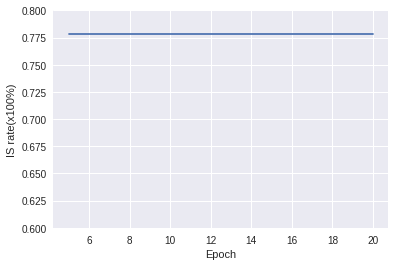

In [0]:
#accp=acc+acc5[2:end]
#print(len(acc))
#print(len(acc5[2:end]))
#x=[1,2,3,4,5,6,7,8,9,10,11,12,15,20,25,30,35,40]
#print(len(x))
x=[5,10,15,20]
fig = plt.figure()
plt.plot(x, acc5 )
plt.xlabel('Epoch')
plt.ylabel('IS rate(x100%)')
plt.ylim((.6,0.8))


In [0]:
f = open('./acc5.data', 'wb')
pickle.dump(acc5,f)
f.close()
from google.colab import files
files.download('acc5.data')

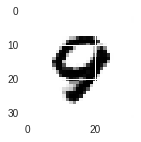

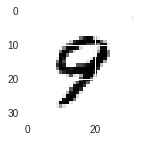

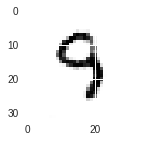

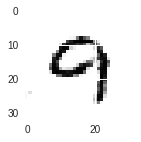

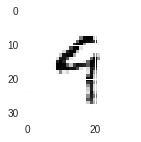

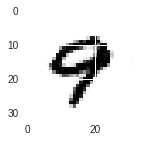

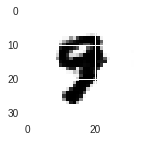

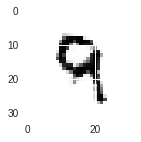

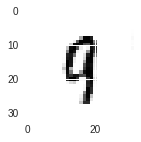

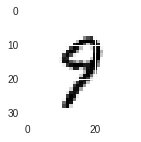

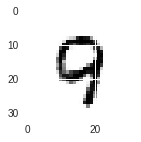

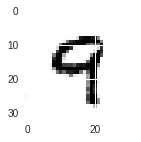

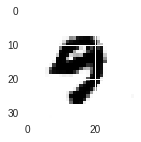

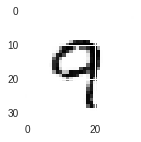

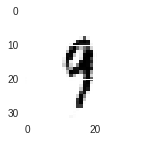

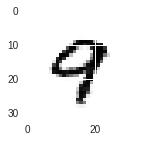

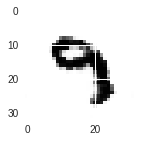

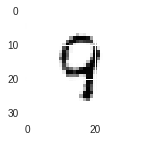

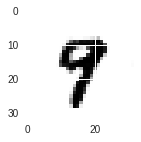

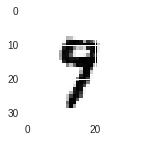

In [0]:
for idx in range(9000,9020):
    image = test_images[idx].squeeze()

    plt.figure(figsize=(2,2))
    plt.imshow(image)

In [0]:
with tf.Session() as sess:

    saver.restore(sess,tf.train.latest_checkpoint("."))
    
    test_accuracy, test_predictions = evaluate(test_images, test_label)
    #print(test_predictions)
    #print(test_label[9020:9080])
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
[2. 9. 3. 9. 5. 9. 9. 9. 1. 9. 9. 9. 9. 7. 1. 9. 3. 3. 9. 9. 9. 5. 7. 9.
 2. 9. 4. 5. 2. 9. 9. 9. 1. 9. 3. 1. 9. 4. 9. 9. 9. 2. 9. 9. 9. 4. 1. 5.
 9. 9. 9. 1. 9. 9. 9. 9. 1. 9. 5. 9. 9. 3. 9. 9. 1. 9. 2. 3. 9. 9. 9. 4.
 3. 9. 9. 9. 9. 7. 1. 9. 5. 1. 9. 9. 3. 3. 5. 9. 9. 9. 1. 4. 9. 9. 2. 4.
 9. 7. 9. 9. 2. 2. 9. 7. 7. 2. 1. 2. 2. 9. 3. 2. 9. 2. 7. 9. 9. 2. 2. 3.
 5. 9. 9. 9. 9. 5. 9. 3. 9. 4. 3. 9. 2. 7. 3. 9. 2. 9. 3. 9. 9. 9. 9. 4.
 2. 9. 2. 9. 7. 2. 5. 9. 9. 9. 9. 5. 9. 9. 9. 9. 9. 1. 2. 9. 1. 9. 9. 7.
 9. 3. 9. 7. 9. 7. 9. 3. 4. 9. 2. 9. 7. 9. 9. 2. 1. 5. 9. 9. 9. 1. 9. 9.
 9. 1. 5. 9. 9. 9. 9. 9. 2. 9. 3. 2. 9. 9. 4. 2. 9. 1. 9. 9. 9. 9. 2. 9.
 9. 2. 1. 4. 9. 9. 9. 5. 9. 9. 7. 2. 9. 9. 5. 3. 9. 7. 9. 2. 9. 9. 1. 4.
 1. 7. 5. 2. 9. 9. 5. 7. 2. 1. 9. 9. 9. 3. 9. 7. 9. 1. 7. 1. 9. 7. 2. 9.
 7. 9. 9. 9. 9. 2. 9. 2. 9. 9. 9. 2. 2. 3. 9. 9. 9. 9. 9. 9. 9. 9. 9. 1.
 5. 7. 9. 3. 9. 9. 9. 7. 1. 9. 9. 4. 3. 5. 1. 9. 9. 3. 9. 9. 9. 9. 9. 9.
 

#Functions for visualisations



In [0]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    img_shape = (32, 32)
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

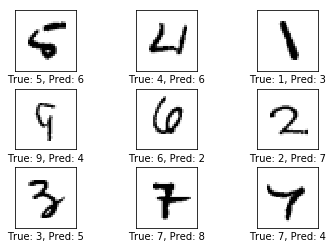

In [0]:
def plot_example_errors(y_pred, y_true):
    # Use TensorFlow to get a list of boolean values
    # whether each test-image has been correctly classified,
    # and a list for the predicted class of each image.
    correct_prediction = np.equal(y_pred, y_true)
       
    # Negate the boolean array.
    incorrect = np.equal(correct_prediction, False)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images = X_test[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = y_pred[incorrect]

    # Get the true classes for those images.
    cls_true = y_true[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9].astype(np.int))

plot_example_errors(test_predictions, y_test)

### Exercises

These are a few suggestions for exercises that may help improve your skills with TensorFlow. It is important to get hands-on experience with TensorFlow in order to learn how to use it properly.

You may want to backup this Notebook before making any changes.

* Change the learning-rate for the optimizer.
* Change the optimizer to e.g. `AdamOptimizer`  
* Change the batch-size to e.g. 1 or 1000.
* How do these changes affect the performance?
* Can you add or remove fully connected and convolutional layers? How does the performance changes?
* Do you get the exact same results if you run the Notebook multiple times without changing any parameters? Why or why not?
* Explain to a friend how the program works.
 

License (MIT)
Copyright (c) 2016 by Magnus Erik Hvass Pedersen

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
